In [1]:
from jupyter_client import find_connection_file
connection_file = find_connection_file()
print(connection_file)

/home/yonatan/.local/share/jupyter/runtime/kernel-v2-5589crhHn8KkfQrL.json


In [2]:
# Constants for this project
import constants
from constants import *

import auxFunctions as af

import importlib

import os
import numpy as np
import pandas as pd

import papermill as pm
import shutil
shutil.copy('constants.py', 'export/')
shutil.copy('auxFunctions.py', 'export/')

# Change the current working directory
os.chdir("/home/yonatan/Documents/projects/vaccines/code")

In [3]:
print(dataset_day_dicts_for_adjFC)

[{'Dataset': 'GSE125921.SDY1529', 'Days': ['D0', 'D84']}, {'Dataset': 'GSE13699.SDY1289', 'Days': ['D0', 'D28']}, {'Dataset': 'GSE169159', 'Days': ['D0', 'D42']}, {'Dataset': 'GSE41080.SDY212', 'Days': ['HAI.D0', 'HAI.D28']}, {'Dataset': 'GSE45735.SDY224', 'Days': ['HAI.D21', 'HAI.D0']}, {'Dataset': 'GSE47353.SDY80', 'Days': ['D70.nAb', 'D0.nAb']}, {'Dataset': 'GSE48018.SDY1276', 'Days': ['nAb.D28', 'nAb.D0']}, {'Dataset': 'GSE48023.SDY1276', 'Days': ['HAI.D14', 'HAI.D0']}, {'Dataset': 'GSE52245.SDY1260', 'Days': ['D0', 'D30']}, {'Dataset': 'GSE59635.SDY63', 'Days': ['HAI.D0', 'HAI.D28']}, {'Dataset': 'GSE59654.SDY180', 'Days': ['HAI.D28', 'HAI.D0']}, {'Dataset': 'GSE59654.SDY404', 'Days': ['HAI.D28', 'HAI.D0']}, {'Dataset': 'GSE59654.SDY520', 'Days': ['HAI.D28', 'HAI.D0']}, {'Dataset': 'GSE59743.SDY400', 'Days': ['HAI.D28', 'HAI.D0']}, {'Dataset': 'GSE79396.SDY984', 'Days': ['D0', 'D28']}, {'Dataset': 'SDY1325', 'Days': ['D0', 'D28']}, {'Dataset': 'SDY296', 'Days': ['D0.HAI', 'D28.HAI

In [4]:
importlib.reload(af)

datasets, metadata = af.load_data()
age_str = f", subjects over the age of {age_threshlod}" if bOlderOnly else ""
print(f"""Analysis parameters: discarding serprotected subjects: {bDiscardSeroprotected}{age_str}""")

# Turn on debug here for running a single dataset through analyze_dataset()
bDebug = False
if bDebug:
    results = af.debug_single_dataset(datasets, metadata)
else:
    results = af.analyze_all_datasets(datasets, metadata)

Analysis parameters: discarding serprotected subjects: True
               uid  IMMAGE   Age   D0     D28  FC  Cluster  adjFC
0   SUB187451.1289    0.08 26.00 0.00  320.00 inf        0    NaN
1   SUB187452.1289   -0.18 23.00 0.00  640.00 inf        0    NaN
2   SUB187453.1289   -0.06 28.00 0.00  640.00 inf        0    NaN
3   SUB187454.1289    0.15 28.00 0.00 1280.00 inf        0    NaN
4   SUB187455.1289   -0.25 25.00 0.00  640.00 inf        0    NaN
5   SUB187456.1289    0.28 43.00 0.00  160.00 inf        0    NaN
6   SUB187457.1289   -0.20 31.00 0.00  640.00 inf        0    NaN
7   SUB187458.1289   -0.28 22.00 0.00  160.00 inf        0    NaN
8   SUB187460.1289    0.07 26.00 0.00  320.00 inf        0    NaN
9   SUB187461.1289   -0.17 23.00 0.00 1280.00 inf        0    NaN
10  SUB187462.1289   -0.01 34.00 0.00  640.00 inf        0    NaN
11  SUB187463.1289    0.00 27.00 0.00 2560.00 inf        0    NaN
12  SUB187464.1289    0.09 25.00 0.00 1280.00 inf        0    NaN
13  SUB187465.12

/home/yonatan/miniforge3/envs/vaccines/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yonatan/miniforge3/envs/vaccines/lib/python3.8/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/yonatan/miniforge3/envs/vaccines/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yonatan/miniforge3/envs/vaccines/lib/python3.8/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (1

In [5]:
results

,Dataset,Strain,strain_index,Day,bAdjustMFC,"(F score, IMMAGE)","(F score, Age)","(F score, Multivariate)","(NR rate over threshold, IMMAGE)","(NR rate over threshold, Age)","(NR rate over threshold, Multivariate)","(NR rate under threshold, IMMAGE)","(NR rate under threshold, Age)","(NR rate under threshold, Multivariate)","(Composite, IMMAGE)","(Composite, Age)","(Composite, Multivariate)","(Max difference, )"
0,GSE13699.SDY1289,Yellow_Fever,0,D28,False,0.52,0.54,0.62,0.57,1.00,1.00,0.90,0.60,0.56,0.55,0.77,0.81,0.04
1,GSE169159,WT_SARS-CoV-2,0,D42,True,0.35,0.22,0.25,0.26,0.43,0.75,0.75,0.24,0.26,0.31,0.32,0.50,0.18
2,GSE169159,WT_SARS-CoV-2,0,D42,False,0.35,0.22,0.25,0.23,0.43,0.75,0.80,0.24,0.26,0.29,0.32,0.50,0.18
3,GSE41080.SDY212,A_Brisbane_10_2007,0,HAI.D28,True,0.17,0.28,0.31,0.56,0.71,0.70,0.29,0.28,0.25,0.36,0.50,0.50,0.01
4,GSE41080.SDY212,A_Brisbane_10_2007,0,HAI.D28,False,0.43,0.44,0.51,0.63,0.68,0.77,0.16,0.28,0.25,0.53,0.56,0.64,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,SDY296,B_Brisbane_60_2008,2,D28.HAI,False,0.24,0.27,0.32,0.62,0.50,0.78,0.44,0.80,0.44,0.43,0.38,0.55,0.16
79,SDY67,A_California_7_2009,0,HAI.D28,True,0.15,0.31,0.36,0.44,0.59,0.60,0.75,0.25,0.20,0.29,0.45,0.48,0.03
80,SDY67,A_California_7_2009,0,HAI.D28,False,0.20,0.41,0.41,0.83,0.70,0.70,0.49,0.28,0.28,0.52,0.56,0.56,0.00
81,SDY67,A_Perth_16_2009,1,HAI.D28,True,0.22,0.18,0.15,0.38,0.37,0.37,0.17,0.19,0.24,0.30,0.27,0.26,0.03


In [19]:
# Get all the analyses that look somewhat promising based on the composite (F1 and over-threshold rate) metric
cols_to_access = [
    dataset_col,
    strain_col,
    day_col,
    "max_difference",
    "bAdjustMFC",
]

# Dynamically add all sub-columns for 'Composite'
composite_columns = [col for col in results.columns if col[0] == 'Composite']
cols_to_access.extend(composite_columns)
results["max_difference"] = results.apply(lambda row: max(row["Composite", "IMMAGE"] - row["Composite", "Age"], row["Composite", "Multivariate"] - row["Composite", "Age"]), axis=1)
results = results.sort_values(by="max_difference", ascending=False)
results = results.loc[results["max_difference"] > 0.1]

# Save results to a pickle file, to be used in other places
results.to_pickle("pickles/results-max-diff_gt_1.pkl")

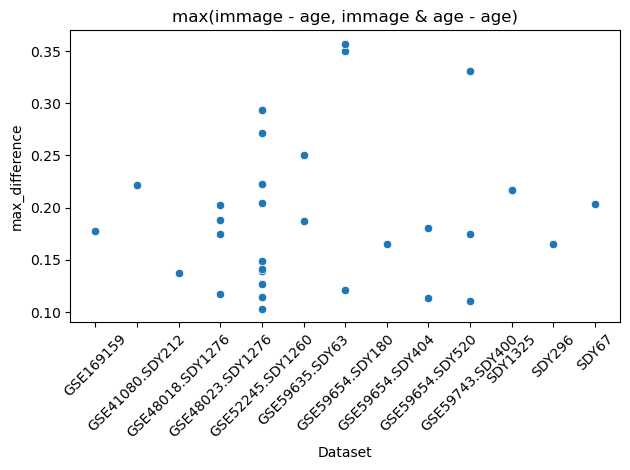

In [7]:
# Plot all datasets with their max-difference metric
import seaborn as sns
import matplotlib.pyplot as plt

importlib.reload(af)

# sorted_data = results.sort_values("max_difference", ignore_index=True).reset_index()
# sns.scatterplot(data=sorted_data, x="index", y="max_difference")
sorted_data = results.loc[results["max_difference"] > 0.1].sort_values(dataset_col, ignore_index=True).reset_index()
sns.scatterplot(data=sorted_data, x=dataset_col, y="max_difference")
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.title(f"max(immage - age, immage & age - age)")
af.save_and_show_plot("figures/all-datasets-max-diff.png")

In [8]:
# score_mask = (results["Composite", "IMMAGE"] >  results["Composite", "Age"]) | (results["Composite", "Multivariate"] >  results["Composite", "Age"])
# results = results.loc[score_mask]

In [14]:
results

,Dataset,Strain,strain_index,Day,bAdjustMFC,"(F score, IMMAGE)","(F score, Age)","(F score, Multivariate)","(NR rate over threshold, IMMAGE)","(NR rate over threshold, Age)","(NR rate over threshold, Multivariate)","(NR rate under threshold, IMMAGE)","(NR rate under threshold, Age)","(NR rate under threshold, Multivariate)","(Composite, IMMAGE)","(Composite, Age)","(Composite, Multivariate)","(Max difference, )",max_difference
43,GSE59654.SDY180,A_Brisbane_10_2007,0,HAI.D28,True,0.60,0.33,0.33,0.25,0.29,1.00,0.50,1.00,0.29,0.42,0.31,0.67,0.36,0.36
44,GSE59654.SDY180,A_Brisbane_10_2007,0,HAI.D28,False,0.46,0.40,0.40,0.33,0.30,1.00,0.67,1.00,0.30,0.40,0.35,0.70,0.35,0.35
67,GSE59743.SDY400,B_Wisonsin_01_2010,2,HAI.D28,True,0.67,0.42,0.60,1.00,0.58,0.86,0.18,0.18,0.19,0.83,0.50,0.73,0.33,0.33
32,GSE52245.SDY1260,IgG_serotype_C,5,D30,False,0.48,0.22,0.40,0.56,0.22,0.47,0.19,0.42,0.13,0.52,0.22,0.43,0.29,0.29
21,GSE52245.SDY1260,IgG1_serotype_A,0,D30,True,0.59,0.24,0.49,0.11,0.25,0.54,0.64,0.36,0.12,0.35,0.24,0.52,0.27,0.27
41,GSE59635.SDY63,B_Brisbane_60_2008,2,HAI.D28,True,0.65,0.45,0.55,0.10,0.20,0.60,0.75,0.50,0.11,0.38,0.33,0.57,0.25,0.25
36,GSE52245.SDY1260,IgM_serotype_C,7,D30,False,0.38,0.13,0.38,0.50,0.31,0.50,0.17,0.29,0.17,0.44,0.22,0.44,0.22,0.22
7,GSE41080.SDY212,B_Florida_4_2006,2,HAI.D28,True,0.36,0.35,0.39,0.90,0.47,0.49,0.27,0.09,0.08,0.63,0.41,0.44,0.22,0.22
69,SDY1325,Neisseria_meningitidis_strain_A_(F8238),0,D28,True,0.44,0.22,0.22,0.67,0.45,0.60,0.17,0.57,0.38,0.56,0.34,0.41,0.22,0.22
70,SDY1325,Neisseria_meningitidis_strain_A_(F8238),0,D28,False,0.44,0.22,0.22,0.67,0.45,0.60,0.17,0.57,0.38,0.56,0.34,0.41,0.22,0.22


In [15]:
# Generate figures as html for promising datasets
for index, row in results.iterrows():
    parameters = {
        "bAdjustMFC" : row["bAdjustMFC"],
        "dataset_name": row[dataset_col],
        "strain_index": row[strain_index_col],
        "day": row[day_col]
    }
    adjFC_str = f"_adjFC" if row["bAdjustMFC"] else ""
    print(f'exporting {row[dataset_col]}, strain no. {row[strain_index_col]}: {row[strain_col]}, day: {row[day_col]}')
    output_notebook_name = f"{row[dataset_col]}_{row[strain_col]}_{row[day_col]}{seroprotected_str}{age_restrict_str}{adjFC_str}"
    output_notebook = f"export/{output_notebook_name}.ipynb"
    try:
            pm.execute_notebook(
                    input_path="vaccines-4.ipynb",
                    output_path=output_notebook,
                    parameters=parameters,
                    prepare_only=True
            )
    except Exception as e:
            print (f"******\nCaught exception when runnnig {output_notebook}\n******\n")
            raise(e)
    # Export the executed notebook to HTML
    output_html = f"{output_notebook_name}.html"
    os.system(f"jupyter nbconvert --execute --no-input --to html {output_notebook} --output {output_html}")

exporting GSE59654.SDY180, strain no. 0: A_Brisbane_10_2007, day: HAI.D28


[NbConvertApp] Converting notebook export/GSE59654.SDY180_A_Brisbane_10_2007_HAI.D28_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 476350 bytes to export/GSE59654.SDY180_A_Brisbane_10_2007_HAI.D28_discard_seroprotected_adjFC.html


exporting GSE59654.SDY180, strain no. 0: A_Brisbane_10_2007, day: HAI.D28


[NbConvertApp] Converting notebook export/GSE59654.SDY180_A_Brisbane_10_2007_HAI.D28_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 479799 bytes to export/GSE59654.SDY180_A_Brisbane_10_2007_HAI.D28_discard_seroprotected.html


exporting GSE59743.SDY400, strain no. 2: B_Wisonsin_01_2010, day: HAI.D28


[NbConvertApp] Converting notebook export/GSE59743.SDY400_B_Wisonsin_01_2010_HAI.D28_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 489942 bytes to export/GSE59743.SDY400_B_Wisonsin_01_2010_HAI.D28_discard_seroprotected_adjFC.html


exporting GSE52245.SDY1260, strain no. 5: IgG_serotype_C, day: D30


[NbConvertApp] Converting notebook export/GSE52245.SDY1260_IgG_serotype_C_D30_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 493453 bytes to export/GSE52245.SDY1260_IgG_serotype_C_D30_discard_seroprotected.html


exporting GSE52245.SDY1260, strain no. 0: IgG1_serotype_A, day: D30


[NbConvertApp] Converting notebook export/GSE52245.SDY1260_IgG1_serotype_A_D30_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 495750 bytes to export/GSE52245.SDY1260_IgG1_serotype_A_D30_discard_seroprotected_adjFC.html


exporting GSE59635.SDY63, strain no. 2: B_Brisbane_60_2008, day: HAI.D28


[NbConvertApp] Converting notebook export/GSE59635.SDY63_B_Brisbane_60_2008_HAI.D28_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 483512 bytes to export/GSE59635.SDY63_B_Brisbane_60_2008_HAI.D28_discard_seroprotected_adjFC.html


exporting GSE52245.SDY1260, strain no. 7: IgM_serotype_C, day: D30


[NbConvertApp] Converting notebook export/GSE52245.SDY1260_IgM_serotype_C_D30_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 492165 bytes to export/GSE52245.SDY1260_IgM_serotype_C_D30_discard_seroprotected.html


exporting GSE41080.SDY212, strain no. 2: B_Florida_4_2006, day: HAI.D28


[NbConvertApp] Converting notebook export/GSE41080.SDY212_B_Florida_4_2006_HAI.D28_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 517678 bytes to export/GSE41080.SDY212_B_Florida_4_2006_HAI.D28_discard_seroprotected_adjFC.html
sh: 1: Syntax error: "(" unexpected
sh: 1: Syntax error: "(" unexpected


exporting SDY1325, strain no. 0: Neisseria_meningitidis_strain_A_(F8238), day: D28
exporting SDY1325, strain no. 0: Neisseria_meningitidis_strain_A_(F8238), day: D28
exporting GSE52245.SDY1260, strain no. 4: IgG_serotype_A, day: D30


[NbConvertApp] Converting notebook export/GSE52245.SDY1260_IgG_serotype_A_D30_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 491544 bytes to export/GSE52245.SDY1260_IgG_serotype_A_D30_discard_seroprotected_adjFC.html


exporting SDY67, strain no. 1: A_Perth_16_2009, day: HAI.D28


[NbConvertApp] Converting notebook export/SDY67_A_Perth_16_2009_HAI.D28_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 531789 bytes to export/SDY67_A_Perth_16_2009_HAI.D28_discard_seroprotected.html


exporting GSE48023.SDY1276, strain no. 0: A_Brisbane_10_2007, day: HAI.D14


[NbConvertApp] Converting notebook export/GSE48023.SDY1276_A_Brisbane_10_2007_HAI.D14_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 542353 bytes to export/GSE48023.SDY1276_A_Brisbane_10_2007_HAI.D14_discard_seroprotected.html


exporting GSE48023.SDY1276, strain no. 0: A_Brisbane_10_2007, day: HAI.D14


[NbConvertApp] Converting notebook export/GSE48023.SDY1276_A_Brisbane_10_2007_HAI.D14_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 541684 bytes to export/GSE48023.SDY1276_A_Brisbane_10_2007_HAI.D14_discard_seroprotected_adjFC.html


exporting GSE59635.SDY63, strain no. 2: B_Brisbane_60_2008, day: HAI.D28


[NbConvertApp] Converting notebook export/GSE59635.SDY63_B_Brisbane_60_2008_HAI.D28_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 481181 bytes to export/GSE59635.SDY63_B_Brisbane_60_2008_HAI.D28_discard_seroprotected.html


exporting GSE59654.SDY520, strain no. 1: A_Victoria_361_2011, day: HAI.D28


[NbConvertApp] Converting notebook export/GSE59654.SDY520_A_Victoria_361_2011_HAI.D28_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 487361 bytes to export/GSE59654.SDY520_A_Victoria_361_2011_HAI.D28_discard_seroprotected.html


exporting GSE169159, strain no. 0: WT_SARS-CoV-2, day: D42


[NbConvertApp] Converting notebook export/GSE169159_WT_SARS-CoV-2_D42_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 489021 bytes to export/GSE169159_WT_SARS-CoV-2_D42_discard_seroprotected_adjFC.html


exporting GSE169159, strain no. 0: WT_SARS-CoV-2, day: D42


[NbConvertApp] Converting notebook export/GSE169159_WT_SARS-CoV-2_D42_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 488381 bytes to export/GSE169159_WT_SARS-CoV-2_D42_discard_seroprotected.html


exporting GSE59743.SDY400, strain no. 2: B_Wisonsin_01_2010, day: HAI.D28


[NbConvertApp] Converting notebook export/GSE59743.SDY400_B_Wisonsin_01_2010_HAI.D28_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 488411 bytes to export/GSE59743.SDY400_B_Wisonsin_01_2010_HAI.D28_discard_seroprotected.html


exporting GSE48023.SDY1276, strain no. 2: B_Florida_4_2006, day: HAI.D14


[NbConvertApp] Converting notebook export/GSE48023.SDY1276_B_Florida_4_2006_HAI.D14_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 534513 bytes to export/GSE48023.SDY1276_B_Florida_4_2006_HAI.D14_discard_seroprotected.html


exporting SDY296, strain no. 2: B_Brisbane_60_2008, day: D28.HAI


[NbConvertApp] Converting notebook export/SDY296_B_Brisbane_60_2008_D28.HAI_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 490901 bytes to export/SDY296_B_Brisbane_60_2008_D28.HAI_discard_seroprotected.html


exporting GSE59654.SDY404, strain no. 1: A_Perth_16_2009, day: HAI.D28


[NbConvertApp] Converting notebook export/GSE59654.SDY404_A_Perth_16_2009_HAI.D28_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 494125 bytes to export/GSE59654.SDY404_A_Perth_16_2009_HAI.D28_discard_seroprotected.html


exporting GSE52245.SDY1260, strain no. 1: IgG1_serotype_C, day: D30


[NbConvertApp] Converting notebook export/GSE52245.SDY1260_IgG1_serotype_C_D30_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 494107 bytes to export/GSE52245.SDY1260_IgG1_serotype_C_D30_discard_seroprotected.html


exporting GSE52245.SDY1260, strain no. 1: IgG1_serotype_C, day: D30


[NbConvertApp] Converting notebook export/GSE52245.SDY1260_IgG1_serotype_C_D30_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 495422 bytes to export/GSE52245.SDY1260_IgG1_serotype_C_D30_discard_seroprotected_adjFC.html


exporting GSE52245.SDY1260, strain no. 5: IgG_serotype_C, day: D30


[NbConvertApp] Converting notebook export/GSE52245.SDY1260_IgG_serotype_C_D30_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 493756 bytes to export/GSE52245.SDY1260_IgG_serotype_C_D30_discard_seroprotected_adjFC.html


exporting GSE48018.SDY1276, strain no. 0: A_Brisbane_10_2007, day: nAb.D28


[NbConvertApp] Converting notebook export/GSE48018.SDY1276_A_Brisbane_10_2007_nAb.D28_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 540548 bytes to export/GSE48018.SDY1276_A_Brisbane_10_2007_nAb.D28_discard_seroprotected_adjFC.html


exporting GSE52245.SDY1260, strain no. 3: IgG2_serotype_C, day: D30


[NbConvertApp] Converting notebook export/GSE52245.SDY1260_IgG2_serotype_C_D30_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 494262 bytes to export/GSE52245.SDY1260_IgG2_serotype_C_D30_discard_seroprotected_adjFC.html


exporting GSE59654.SDY180, strain no. 2: B_Brisbane_60_2008, day: HAI.D28


[NbConvertApp] Converting notebook export/GSE59654.SDY180_B_Brisbane_60_2008_HAI.D28_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 479218 bytes to export/GSE59654.SDY180_B_Brisbane_60_2008_HAI.D28_discard_seroprotected_adjFC.html


exporting GSE48023.SDY1276, strain no. 1: A_Brisbane_59_2007, day: HAI.D14


[NbConvertApp] Converting notebook export/GSE48023.SDY1276_A_Brisbane_59_2007_HAI.D14_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 533292 bytes to export/GSE48023.SDY1276_A_Brisbane_59_2007_HAI.D14_discard_seroprotected_adjFC.html


exporting GSE52245.SDY1260, strain no. 7: IgM_serotype_C, day: D30


[NbConvertApp] Converting notebook export/GSE52245.SDY1260_IgM_serotype_C_D30_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 493996 bytes to export/GSE52245.SDY1260_IgM_serotype_C_D30_discard_seroprotected_adjFC.html


exporting GSE59654.SDY520, strain no. 3: B_Massachusetts_2_2012, day: HAI.D28


[NbConvertApp] Converting notebook export/GSE59654.SDY520_B_Massachusetts_2_2012_HAI.D28_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 483187 bytes to export/GSE59654.SDY520_B_Massachusetts_2_2012_HAI.D28_discard_seroprotected.html


exporting GSE59743.SDY400, strain no. 0: A_California_7_2009, day: HAI.D28


[NbConvertApp] Converting notebook export/GSE59743.SDY400_A_California_7_2009_HAI.D28_discard_seroprotected_adjFC.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 490684 bytes to export/GSE59743.SDY400_A_California_7_2009_HAI.D28_discard_seroprotected_adjFC.html


exporting GSE52245.SDY1260, strain no. 3: IgG2_serotype_C, day: D30


[NbConvertApp] Converting notebook export/GSE52245.SDY1260_IgG2_serotype_C_D30_discard_seroprotected.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 494527 bytes to export/GSE52245.SDY1260_IgG2_serotype_C_D30_discard_seroprotected.html


In [ ]:
cols_to_access

['Dataset',
 'Strain',
 'Day',
 'max_difference',
 'bAjustMFC',
 ('Composite', 'IMMAGE'),
 ('Composite', 'Age'),
 ('Composite', 'Multivariate')]

In [20]:
# Save promising results to a spreadsheet
def generate_html_path(row):
    output_html = f"{row[dataset_col]}_{row[strain_col]}_{row[day_col]}{seroprotected_str}{age_restrict_str}.html"
    output_html = os.path.join(af.get_dir_by_name('code'), "export", output_html)    
    output_html = '=HYPERLINK("file://' + output_html + '", "Link")'
    return output_html

results = results[cols_to_access] 
results['html_path'] = results.apply(generate_html_path, axis=1)
results.to_csv(f"export/results_{seroprotected_str}{age_restrict_str}{adjFC_str}.csv", index=False, float_format='%.2f')

In [12]:
results

,Dataset,Strain,strain_index,Day,bAdjustMFC,"(F score, IMMAGE)","(F score, Age)","(F score, Multivariate)","(NR rate over threshold, IMMAGE)","(NR rate over threshold, Age)","(NR rate over threshold, Multivariate)","(NR rate under threshold, IMMAGE)","(NR rate under threshold, Age)","(NR rate under threshold, Multivariate)","(Composite, IMMAGE)","(Composite, Age)","(Composite, Multivariate)","(Max difference, )",max_difference
43,GSE59654.SDY180,A_Brisbane_10_2007,0,HAI.D28,True,0.60,0.33,0.33,0.25,0.29,1.00,0.50,1.00,0.29,0.42,0.31,0.67,0.36,0.36
44,GSE59654.SDY180,A_Brisbane_10_2007,0,HAI.D28,False,0.46,0.40,0.40,0.33,0.30,1.00,0.67,1.00,0.30,0.40,0.35,0.70,0.35,0.35
67,GSE59743.SDY400,B_Wisonsin_01_2010,2,HAI.D28,True,0.67,0.42,0.60,1.00,0.58,0.86,0.18,0.18,0.19,0.83,0.50,0.73,0.33,0.33
32,GSE52245.SDY1260,IgG_serotype_C,5,D30,False,0.48,0.22,0.40,0.56,0.22,0.47,0.19,0.42,0.13,0.52,0.22,0.43,0.29,0.29
21,GSE52245.SDY1260,IgG1_serotype_A,0,D30,True,0.59,0.24,0.49,0.11,0.25,0.54,0.64,0.36,0.12,0.35,0.24,0.52,0.27,0.27
41,GSE59635.SDY63,B_Brisbane_60_2008,2,HAI.D28,True,0.65,0.45,0.55,0.10,0.20,0.60,0.75,0.50,0.11,0.38,0.33,0.57,0.25,0.25
36,GSE52245.SDY1260,IgM_serotype_C,7,D30,False,0.38,0.13,0.38,0.50,0.31,0.50,0.17,0.29,0.17,0.44,0.22,0.44,0.22,0.22
7,GSE41080.SDY212,B_Florida_4_2006,2,HAI.D28,True,0.36,0.35,0.39,0.90,0.47,0.49,0.27,0.09,0.08,0.63,0.41,0.44,0.22,0.22
70,SDY1325,Neisseria_meningitidis_strain_A_(F8238),0,D28,False,0.44,0.22,0.22,0.67,0.45,0.60,0.17,0.57,0.38,0.56,0.34,0.41,0.22,0.22
69,SDY1325,Neisseria_meningitidis_strain_A_(F8238),0,D28,True,0.44,0.22,0.22,0.67,0.45,0.60,0.17,0.57,0.38,0.56,0.34,0.41,0.22,0.22
